In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from collections import defaultdict

In [123]:
df = defaultdict(list)

df['data'] = np.random.normal(100,25,100)
df['x'] = range(1,len(df['data'])+1)

df = pd.DataFrame(df)

In [124]:
# the Henderson Filter weights

w_middle = (-0.07343, 0.29371, 0.55944, 0.29371, -0.07343) # middle points
w_t1 = (0, 0, 0.76467, 0.36713, -0.13181) # starting point
w_t2 = (0, 0.22776, 0.52522, 0.29121,-0.04419) # second point
w_t_2 = (-0.04419, 0.29121, 0.52522, 0.22776, 0) # T_max
w_t_1 = (-0.13181, 0.36713, 0.76467, 0, 0) # T_max - 1

In [130]:
df['y'] = 0

def HendersonFilter (df):
    for i in range(len(df)):
        if i == 0:
            df.loc[i, 'y'] = np.dot(w_t1, df['data'][:5])
        elif i == 1:
            df.loc[i, 'y'] = np.dot(w_t2, df['data'][:5])
        elif i == (len(df)-2):
            df.loc[i, 'y'] = np.dot(w_t_2, df['data'][-5:])
        elif i == (len(df)-1):
            df.loc[i, 'y'] = np.dot(w_t_1, df['data'][-5:])
        else:
            df.loc[i, 'y'] = np.dot(w_middle, df['data'][i-2:i+3])

In [131]:
HendersonFilter(df)

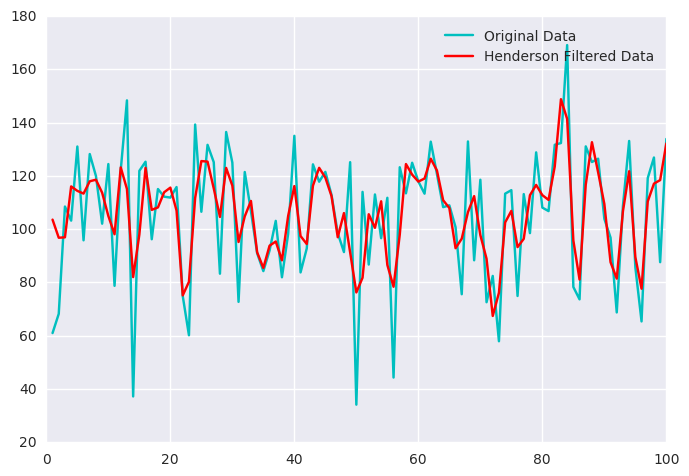

In [132]:
plt.figure()

plt.plot(df['x'], df['data'], c = 'c', label = 'Original Data')
plt.plot(df['x'], df['y'], c = 'r', label = 'Henderson Filtered Data')
plt.legend()
plt.show()
sns.despine()